#CLEAN DATA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import plotly.express as px


from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('raw_data.csv')
df

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,an uneventful flight,N Vickers,2016-06-20,Korean Air,True,"KE124, Brisbane to Incheon (A330) and KE867,...",Business,June 2016,BNE to ULN via ICN,Economy Class,5,4,5,3,4,7,yes
8096,Korean Air always impresses,Kim Holloway,2016-06-12,Korean Air,False,Our recent flight was our fourth trip to the...,Couple Leisure,June 2016,SYD to LHR via ICN,Economy Class,3,5,5,4,5,10,yes
8097,didn’t offer anything,C Clark,2016-06-06,Korean Air,True,I flew Korean Air from Bali to Seoul in Pres...,Business,April 2016,DPS to ICN,Business Class,4,5,5,5,1,2,no
8098,appreciated the service onboard,E Petan,2016-04-21,Korean Air,False,Seoul to Paris with Korean Air. I am traveli...,Business,April 2016,ICN to CDG,Business Class,5,1,3,4,5,10,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

In [ ]:
df.isna().sum()

Title                     0
Name                      0
Review Date               0
Airline                   0
Verified                  0
Reviews                   0
Type of Traveller         0
Month Flown               0
Route                     0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
Recommended               0
dtype: int64

In [ ]:
df = df[df['Verified'] == 'True']

In [ ]:
df = df.drop(columns = 'Verified',axis = 1)
df = df.drop(columns = 'Reviews',axis = 1)
df = df.drop(columns = 'Review Date',axis = 1)
df = df.drop(columns = 'Title',axis = 1)

In [ ]:
df[['FromTo','Via']] = df['Route'].str.split(' via ', expand=True)
df[['From','To']] = df['FromTo'].str.split(' to ', expand=True)

In [ ]:
df = df.drop(columns = 'FromTo',axis = 1)
df = df.drop(columns = 'Route',axis = 1)

In [ ]:
df.fillna('No', inplace=True)
df

,Name,Airline,Type of Traveller,Month Flown,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Via,From,To
0,Alison Soetantyo,Singapore Airlines,Solo Leisure,December 2023,Business Class,4,4,4,4,4,9,yes,No,Jakarta,Singapore
1,Robert Watson,Singapore Airlines,Solo Leisure,February 2024,Economy Class,5,3,4,4,1,3,no,No,Phuket,Singapore
2,S Han,Singapore Airlines,Family Leisure,February 2024,Economy Class,1,5,2,1,5,10,yes,No,Siem Reap,Singapore
3,D Laynes,Singapore Airlines,Solo Leisure,February 2024,Economy Class,5,5,5,5,5,10,yes,No,Singapore,London Heathrow
4,A Othman,Singapore Airlines,Family Leisure,February 2024,Economy Class,5,5,5,5,5,10,yes,No,Singapore,Phnom Penh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8085,G Nazano,Korean Air,Business,September 2016,Business Class,4,5,3,4,1,1,no,ICN,JFK,TAS
8086,V Anderson,Korean Air,Solo Leisure,September 2016,Economy Class,4,5,4,4,5,10,yes,No,SFO,ICN
8093,F Lee,Korean Air,Solo Leisure,July 2016,Economy Class,3,4,5,4,3,7,yes,ICN,SEA,SIN
8095,N Vickers,Korean Air,Business,June 2016,Economy Class,5,4,5,3,4,7,yes,ICN,BNE,ULN


In [ ]:
df[['Month','Year']] = df['Month Flown'].str.split(' ', expand=True)

In [ ]:
df['Month Flown'] = pd.to_datetime(df['Month Flown'], format='%B %Y')

In [ ]:
df['Month'] = pd.to_datetime(df['Month'], format='%B')


In [ ]:
df

,Name,Airline,Type of Traveller,Month Flown,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Via,From,To,Month,Year
0,Alison Soetantyo,Singapore Airlines,Solo Leisure,2023-12-01,Business Class,4,4,4,4,4,9,yes,No,Jakarta,Singapore,1900-12-01,2023
1,Robert Watson,Singapore Airlines,Solo Leisure,2024-02-01,Economy Class,5,3,4,4,1,3,no,No,Phuket,Singapore,1900-02-01,2024
2,S Han,Singapore Airlines,Family Leisure,2024-02-01,Economy Class,1,5,2,1,5,10,yes,No,Siem Reap,Singapore,1900-02-01,2024
3,D Laynes,Singapore Airlines,Solo Leisure,2024-02-01,Economy Class,5,5,5,5,5,10,yes,No,Singapore,London Heathrow,1900-02-01,2024
4,A Othman,Singapore Airlines,Family Leisure,2024-02-01,Economy Class,5,5,5,5,5,10,yes,No,Singapore,Phnom Penh,1900-02-01,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8085,G Nazano,Korean Air,Business,2016-09-01,Business Class,4,5,3,4,1,1,no,ICN,JFK,TAS,1900-09-01,2016
8086,V Anderson,Korean Air,Solo Leisure,2016-09-01,Economy Class,4,5,4,4,5,10,yes,No,SFO,ICN,1900-09-01,2016
8093,F Lee,Korean Air,Solo Leisure,2016-07-01,Economy Class,3,4,5,4,3,7,yes,ICN,SEA,SIN,1900-07-01,2016
8095,N Vickers,Korean Air,Business,2016-06-01,Economy Class,5,4,5,3,4,7,yes,ICN,BNE,ULN,1900-06-01,2016


#BUSINESS UNDERSTANDING


Building and Evaluating a Machine Learning Model Using Airline Reviews Data

Problem Description: The task is to develop a machine learning model that predicts whether a customer is likely to recommend an airline based on their reviews. This is a supervised learning problem, specifically a binary classification task, with the following output classes:

1: Yes (Customer is likely to recommend)

0: No (Customer is not likely to recommend)

Data Description: The dataset used for this task consists of airline reviews from various airlines from 2013-2024, comprising 6,216 records after data cleaning (equivalent to 6,216 reviews). Each review includes 17 relevant attributes:

Airline: Airline name

Type of Traveler: Type of traveller

Month Flown: Month of flight

Class: Ticket class

Seat Comfort: Seat comfort rating

Food and Beverages: Food and beverage rating

Inflight Entertainment: Inflight entertainment rating

Value For Money: Value for money rating

Overall Rating: Overall rating

Recommended: Whether the customer recommends the airline or not

From: Departure point

Via: Transit point

To: Destination

Name: Customer name

Staff Service: Staff service rating

Month: Month of flight

Year: Year of flight

#DATA UNDERSTANDING

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6216 entries, 0 to 8097
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Name                    6216 non-null   object        
 1   Airline                 6216 non-null   object        
 2   Type of Traveller       6216 non-null   object        
 3   Month Flown             6216 non-null   datetime64[ns]
 4   Class                   6216 non-null   object        
 5   Seat Comfort            6216 non-null   int64         
 6   Staff Service           6216 non-null   int64         
 7   Food & Beverages        6216 non-null   int64         
 8   Inflight Entertainment  6216 non-null   int64         
 9   Value For Money         6216 non-null   int64         
 10  Overall Rating          6216 non-null   int64         
 11  Recommended             6216 non-null   object        
 12  Via                     6216 non-null   object       

In [ ]:
df.shape

(6216, 17)

In [ ]:
df.isna().sum()

Name                      0
Airline                   0
Type of Traveller         0
Month Flown               0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
Recommended               0
Via                       0
From                      0
To                        0
Month                     0
Year                      0
dtype: int64

#DATA PREPROCESSING

In [ ]:
df.describe()

,Month Flown,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Month
count,6216,6216.000000,6216.000000,6216.000000,6216.000000,6216.000000,6216.000000,6216
mean,2019-11-26 00:42:51.428571392,3.402671,3.568050,3.367117,3.635457,3.116634,5.573842,1900-06-20 14:24:19.459459328
min,2013-03-01 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1900-01-01 00:00:00
25%,2018-03-01 00:00:00,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1900-03-01 00:00:00
50%,2019-06-01 00:00:00,4.000000,4.000000,4.000000,4.000000,3.000000,6.000000,1900-07-01 00:00:00
75%,2022-02-01 00:00:00,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000,1900-10-01 00:00:00
max,2024-03-01 00:00:00,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,1900-12-01 00:00:00
std,NaN,1.401018,1.527396,1.459909,1.310638,1.589307,3.535502,NaN


Nhìn chung data ko có dấu hiệu bất thường

#EDA

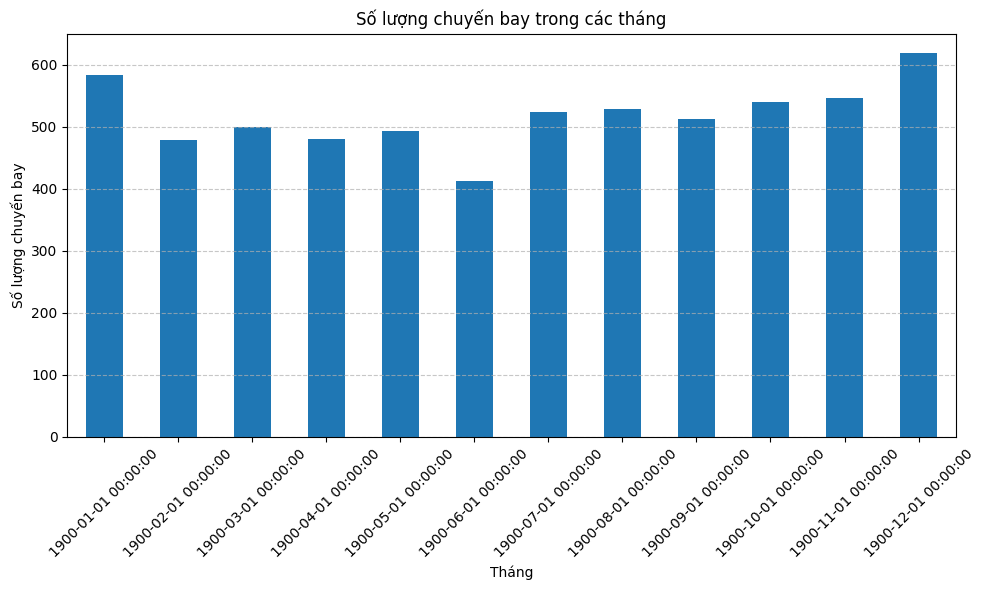

In [ ]:
flightm_counts = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
flightm_counts.plot(kind='bar')
plt.title('Số lượng chuyến bay trong các tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượng chuyến bay')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Số lượng chuyến bay các tháng được phân bố khá đồng đều nhưng đỉnh điểm vào tháng 1 và tháng 12

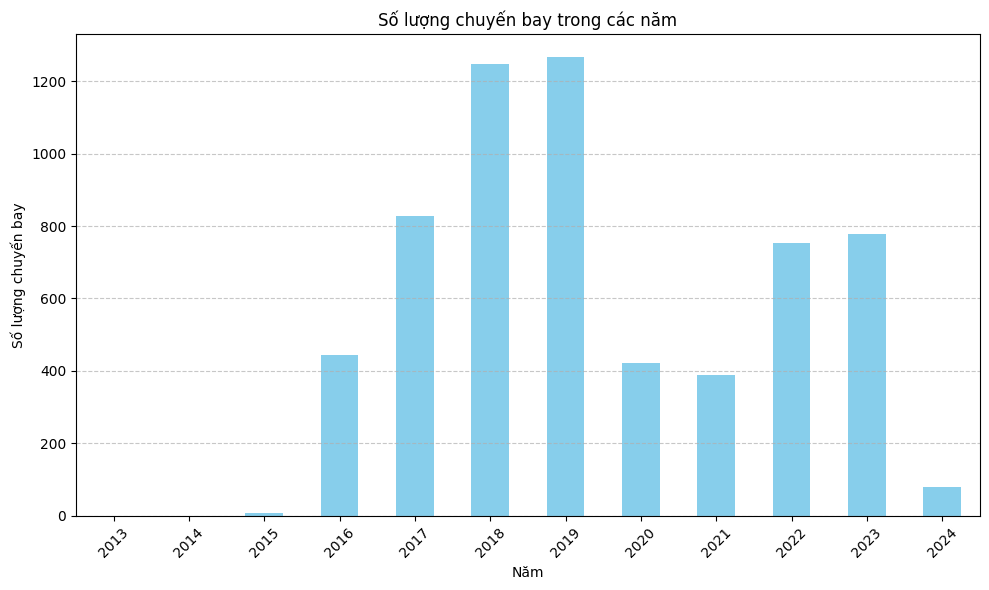

In [ ]:
flighty_counts = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
flighty_counts.plot(kind='bar', color='skyblue')
plt.title('Số lượng chuyến bay trong các năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng chuyến bay')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dữ liệu từ 2013-2015 là rất ít.

Việc lấy đánh giá từ khách hàng được sử dụng đáng kể hơn vào 2016.

Vào 2 năm 2018, 2019 số lượng đánh giá đạt cao nhất.

Năm 2020, 2021 do ảnh hương của dịch và các yếu tố khác nên số lượng đánh giá tỉ lệ thuận với số lượng chuyến bay cũng đi xuống.

Sau khi qua 2 năm trên số lượng đánh giá cũng như số lượng chuyến bay đang trên qua trình hồi phục lại

In [ ]:
min_year_by_airline = df.groupby('Airline')['Year'].min()

min_year_by_airline

Airline
Air France                2016
All Nippon Airways        2016
Cathay Pacific Airways    2015
EVA Air                   2015
Emirates                  2015
Japan Airlines            2015
Korean Air                2016
Qatar Airways             2016
Singapore Airlines        2013
Turkish Airlines          2015
Name: Year, dtype: object

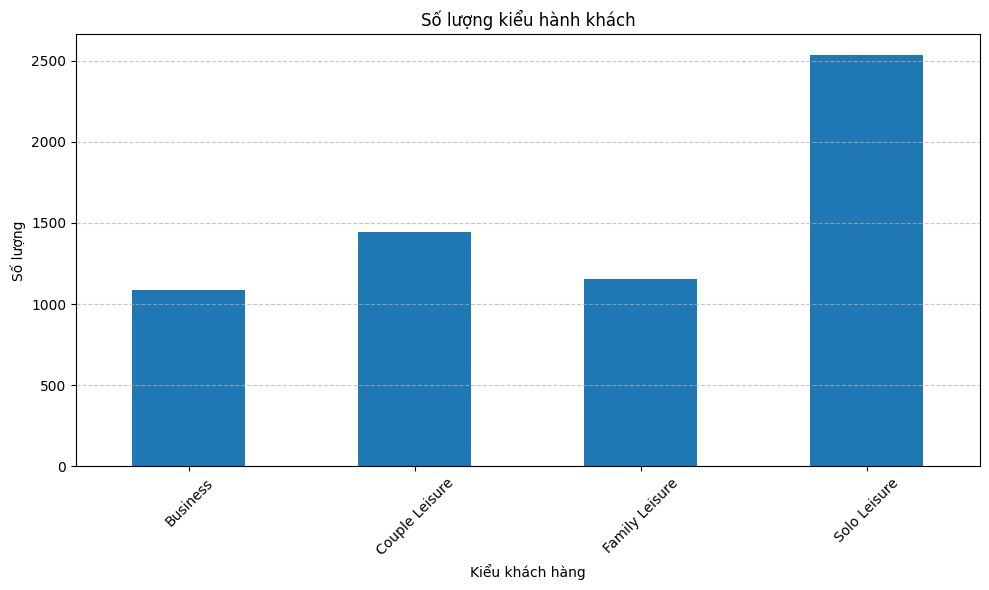

In [ ]:
flighttype_counts = df['Type of Traveller'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
flighttype_counts.plot(kind='bar')
plt.title('Số lượng kiểu hành khách')
plt.xlabel('Kiểu khách hàng')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
min_year_by_airline = df.groupby('Airline')['Year'].min()

min_year_by_airline

Airline
Air France                2016
All Nippon Airways        2016
Cathay Pacific Airways    2015
EVA Air                   2015
Emirates                  2015
Japan Airlines            2015
Korean Air                2016
Qatar Airways             2016
Singapore Airlines        2013
Turkish Airlines          2015
Name: Year, dtype: object

Chỉ có Singapore Airlines lấy đánh giá từ năm 2013. Điều này giải thích cho việc dữ liệu các năm trước 2015 là rất ít.

Các hãng hàng không bắt đầu lấy đánh giá từ năm 2015 nên số lượng đánh giá nhận về cũng bắt đầu tăng vọt từ năm 2015.

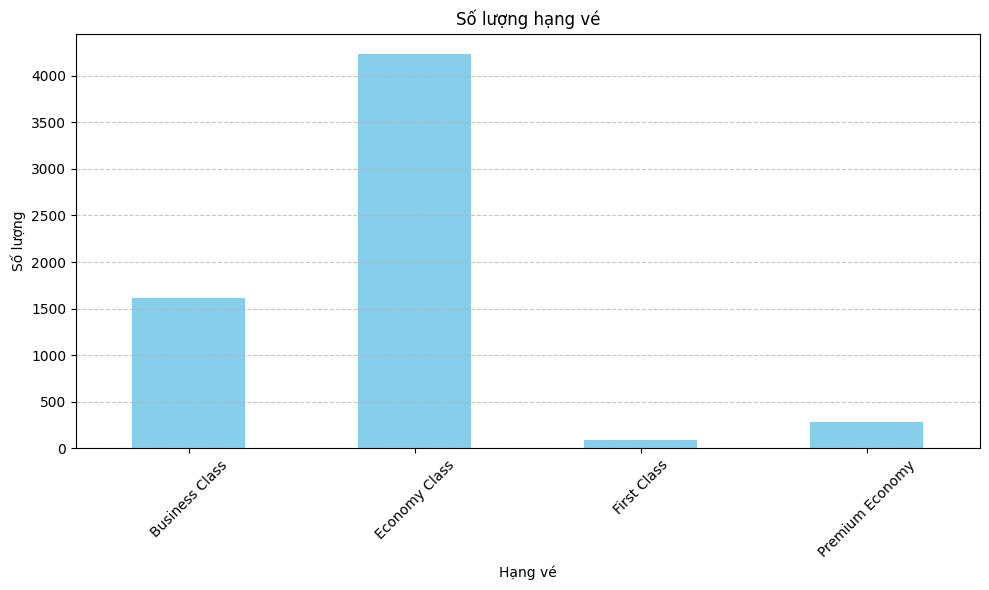

In [ ]:
flightclass_counts = df['Class'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
flightclass_counts.plot(kind='bar', color='skyblue')
plt.title('Số lượng hạng vé')
plt.xlabel('Hạng vé')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Số lượng hạng vé phổ thông là cao nhất do hướng đến các đối tượng có thu nhập trung bình trong xã hội(đối tượng chiếm đông nhất)

In [ ]:
df['From'].value_counts()

From
Singapore           311
London              256
Istanbul            235
Bangkok             224
Dubai               223
                   ... 
India                 1
Sochi                 1
Saint Petersburg      1
Faisalabad            1
SEA                   1
Name: count, Length: 569, dtype: int64

In [ ]:
df['To'].value_counts()

To
Singapore           336
Bangkok             252
Istanbul            238
Doha                222
London              218
                   ... 
Milano Malpensa       1
Mardin                1
Singapore Return      1
Samarkand             1
ULN                   1
Name: count, Length: 604, dtype: int64

In [ ]:
df['Via'].value_counts()

Via
No                              3012
Doha                             807
Istanbul                         674
Dubai                            477
Singapore                        208
                                ... 
Harare                             1
Dubia                              1
Dubai, Bangkok, Kuala Lumpur       1
dubai                              1
Arlanda Sweden                     1
Name: count, Length: 171, dtype: int64

Singapore có số lượng  lượt đánh giá lớn nhất cho cả chiều đến và chiều đi tương đương với số lượng chuyến bay lớn nhất.

In [ ]:
df

,Name,Airline,Type of Traveller,Month Flown,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Via,From,To,Month,Year
0,Alison Soetantyo,Singapore Airlines,Solo Leisure,2023-12-01,Business Class,4,4,4,4,4,9,yes,No,Jakarta,Singapore,1900-12-01,2023
1,Robert Watson,Singapore Airlines,Solo Leisure,2024-02-01,Economy Class,5,3,4,4,1,3,no,No,Phuket,Singapore,1900-02-01,2024
2,S Han,Singapore Airlines,Family Leisure,2024-02-01,Economy Class,1,5,2,1,5,10,yes,No,Siem Reap,Singapore,1900-02-01,2024
3,D Laynes,Singapore Airlines,Solo Leisure,2024-02-01,Economy Class,5,5,5,5,5,10,yes,No,Singapore,London Heathrow,1900-02-01,2024
4,A Othman,Singapore Airlines,Family Leisure,2024-02-01,Economy Class,5,5,5,5,5,10,yes,No,Singapore,Phnom Penh,1900-02-01,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8085,G Nazano,Korean Air,Business,2016-09-01,Business Class,4,5,3,4,1,1,no,ICN,JFK,TAS,1900-09-01,2016
8086,V Anderson,Korean Air,Solo Leisure,2016-09-01,Economy Class,4,5,4,4,5,10,yes,No,SFO,ICN,1900-09-01,2016
8093,F Lee,Korean Air,Solo Leisure,2016-07-01,Economy Class,3,4,5,4,3,7,yes,ICN,SEA,SIN,1900-07-01,2016
8095,N Vickers,Korean Air,Business,2016-06-01,Economy Class,5,4,5,3,4,7,yes,ICN,BNE,ULN,1900-06-01,2016


In [ ]:
def sort_airlines_by_seat_comfort(airlines_data):
    avg_seat_comfort = airlines_data.groupby('Airline')['Seat Comfort'].mean().reset_index()
    sasc = avg_seat_comfort.sort_values(by='Seat Comfort', ascending=False)
    return sasc
sasc = sort_airlines_by_seat_comfort(df)
sasc

,Airline,Seat Comfort
1,All Nippon Airways,4.140000
7,Qatar Airways,3.955759
3,EVA Air,3.920561
5,Japan Airlines,3.877301
8,Singapore Airlines,3.668442
6,Korean Air,3.636364
2,Cathay Pacific Airways,3.598230
4,Emirates,3.128385
0,Air France,2.920195
9,Turkish Airlines,2.747045


In [ ]:
def sort_airlines_by_staff_service(airlines_data):
    avg_staff_service = airlines_data.groupby('Airline')['Staff Service'].mean().reset_index()
    sass = avg_staff_service.sort_values(by='Staff Service', ascending=False)
    return sass
sass = sort_airlines_by_staff_service(df)
sass

,Airline,Staff Service
1,All Nippon Airways,4.515000
7,Qatar Airways,4.291381
3,EVA Air,4.191589
5,Japan Airlines,4.141104
8,Singapore Airlines,3.902796
6,Korean Air,3.825758
2,Cathay Pacific Airways,3.596460
0,Air France,3.298046
4,Emirates,2.939819
9,Turkish Airlines,2.879433


In [ ]:
def sort_airlines_by_food_bev(airlines_data):
    avg_food_bev = airlines_data.groupby('Airline')['Food & Beverages'].mean().reset_index()
    safb = avg_food_bev.sort_values(by='Food & Beverages', ascending=False)
    return safb
safb = sort_airlines_by_food_bev(df)
safb

,Airline,Food & Beverages
1,All Nippon Airways,4.015000
7,Qatar Airways,3.932876
3,EVA Air,3.845794
5,Japan Airlines,3.785276
6,Korean Air,3.537879
8,Singapore Airlines,3.536618
2,Cathay Pacific Airways,3.175221
0,Air France,3.094463
9,Turkish Airlines,2.972419
4,Emirates,2.950853


In [ ]:
def sort_airlines_by_inflight_ent(airlines_data):
    avg_inflight_ent = airlines_data.groupby('Airline')['Inflight Entertainment'].mean().reset_index()
    saie = avg_inflight_ent.sort_values(by='Inflight Entertainment', ascending=False)
    return sass
saie = sort_airlines_by_inflight_ent(df)
saie

,Airline,Staff Service
1,All Nippon Airways,4.515000
7,Qatar Airways,4.291381
3,EVA Air,4.191589
5,Japan Airlines,4.141104
8,Singapore Airlines,3.902796
6,Korean Air,3.825758
2,Cathay Pacific Airways,3.596460
0,Air France,3.298046
4,Emirates,2.939819
9,Turkish Airlines,2.879433


In [ ]:
def sort_airlines_by_money(airlines_data):
    avg_money = airlines_data.groupby('Airline')['Value For Money'].mean().reset_index()
    savm = avg_money.sort_values(by='Value For Money', ascending=False)
    return savm
savm = sort_airlines_by_money(df)
savm

,Airline,Value For Money
1,All Nippon Airways,4.085000
3,EVA Air,3.929907
7,Qatar Airways,3.711670
5,Japan Airlines,3.687117
6,Korean Air,3.469697
8,Singapore Airlines,3.452730
2,Cathay Pacific Airways,3.320354
4,Emirates,2.674022
0,Air France,2.672638
9,Turkish Airlines,2.375099


In [ ]:
def sort_airlines_by_overall_rating(airlines_data):
    avg_overall_rating = airlines_data.groupby('Airline')['Overall Rating'].mean().reset_index()
    saor = avg_overall_rating.sort_values(by='Overall Rating', ascending=False)
    return saor
saor = sort_airlines_by_overall_rating(df)
saor

,Airline,Overall Rating
1,All Nippon Airways,7.850000
3,EVA Air,7.224299
7,Qatar Airways,7.072464
5,Japan Airlines,6.858896
8,Singapore Airlines,6.549933
6,Korean Air,6.136364
2,Cathay Pacific Airways,6.099115
0,Air France,4.664495
4,Emirates,4.520562
9,Turkish Airlines,3.620961


Trong tất cả các tiêu chí đánh giá, All Nippon Airways đều dẫn đầu

#Encoding

In [ ]:
df

,Name,Airline,Type of Traveller,Month Flown,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Via,From,To,Month,Year
0,Alison Soetantyo,Singapore Airlines,Solo Leisure,2023-12-01,Business Class,4,4,4,4,4,9,yes,No,Jakarta,Singapore,1900-12-01,2023
1,Robert Watson,Singapore Airlines,Solo Leisure,2024-02-01,Economy Class,5,3,4,4,1,3,no,No,Phuket,Singapore,1900-02-01,2024
2,S Han,Singapore Airlines,Family Leisure,2024-02-01,Economy Class,1,5,2,1,5,10,yes,No,Siem Reap,Singapore,1900-02-01,2024
3,D Laynes,Singapore Airlines,Solo Leisure,2024-02-01,Economy Class,5,5,5,5,5,10,yes,No,Singapore,London Heathrow,1900-02-01,2024
4,A Othman,Singapore Airlines,Family Leisure,2024-02-01,Economy Class,5,5,5,5,5,10,yes,No,Singapore,Phnom Penh,1900-02-01,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8085,G Nazano,Korean Air,Business,2016-09-01,Business Class,4,5,3,4,1,1,no,ICN,JFK,TAS,1900-09-01,2016
8086,V Anderson,Korean Air,Solo Leisure,2016-09-01,Economy Class,4,5,4,4,5,10,yes,No,SFO,ICN,1900-09-01,2016
8093,F Lee,Korean Air,Solo Leisure,2016-07-01,Economy Class,3,4,5,4,3,7,yes,ICN,SEA,SIN,1900-07-01,2016
8095,N Vickers,Korean Air,Business,2016-06-01,Economy Class,5,4,5,3,4,7,yes,ICN,BNE,ULN,1900-06-01,2016


In [ ]:
new_df = df.drop(['Month', 'Year', 'Name','Month Flown'], axis=1)
new_df

,Airline,Type of Traveller,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Via,From,To
0,Singapore Airlines,Solo Leisure,Business Class,4,4,4,4,4,9,yes,No,Jakarta,Singapore
1,Singapore Airlines,Solo Leisure,Economy Class,5,3,4,4,1,3,no,No,Phuket,Singapore
2,Singapore Airlines,Family Leisure,Economy Class,1,5,2,1,5,10,yes,No,Siem Reap,Singapore
3,Singapore Airlines,Solo Leisure,Economy Class,5,5,5,5,5,10,yes,No,Singapore,London Heathrow
4,Singapore Airlines,Family Leisure,Economy Class,5,5,5,5,5,10,yes,No,Singapore,Phnom Penh
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8085,Korean Air,Business,Business Class,4,5,3,4,1,1,no,ICN,JFK,TAS
8086,Korean Air,Solo Leisure,Economy Class,4,5,4,4,5,10,yes,No,SFO,ICN
8093,Korean Air,Solo Leisure,Economy Class,3,4,5,4,3,7,yes,ICN,SEA,SIN
8095,Korean Air,Business,Economy Class,5,4,5,3,4,7,yes,ICN,BNE,ULN


In [ ]:
object_col = new_df.select_dtypes(include = 'object').columns.tolist()

In [ ]:
object_col

['Airline', 'Type of Traveller', 'Class', 'Recommended', 'Via', 'From', 'To']

In [ ]:
label_encode = LabelEncoder()
for i in object_col:
  new_df[i] = label_encode.fit_transform(df[i])

In [ ]:
new_df1 = new_df.copy()

In [ ]:
new_df

,Airline,Type of Traveller,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Via,From,To
0,8,3,0,4,4,4,4,4,9,1,114,247,508
1,8,3,1,5,3,4,4,1,3,0,114,426,508
2,8,2,1,1,5,2,1,5,10,1,114,482,508
3,8,3,1,5,5,5,5,5,10,1,114,484,323
4,8,2,1,5,5,5,5,5,10,1,114,484,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8085,6,0,0,4,5,3,4,1,1,0,69,244,526
8086,6,3,1,4,5,4,4,5,10,1,114,448,250
8093,6,3,1,3,4,5,4,3,7,1,69,447,471
8095,6,0,1,5,4,5,3,4,7,1,69,42,563


In [ ]:
new_df1 = new_df1.drop(['Recommended'],axis =1)

In [ ]:
new_df1

,Airline,Type of Traveller,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Via,From,To
0,8,3,0,4,4,4,4,4,9,114,247,508
1,8,3,1,5,3,4,4,1,3,114,426,508
2,8,2,1,1,5,2,1,5,10,114,482,508
3,8,3,1,5,5,5,5,5,10,114,484,323
4,8,2,1,5,5,5,5,5,10,114,484,444
...,...,...,...,...,...,...,...,...,...,...,...,...
8085,6,0,0,4,5,3,4,1,1,69,244,526
8086,6,3,1,4,5,4,4,5,10,114,448,250
8093,6,3,1,3,4,5,4,3,7,69,447,471
8095,6,0,1,5,4,5,3,4,7,69,42,563


#Scalling Data

In [ ]:
scaler = StandardScaler()
data = scaler.fit_transform(new_df1)

In [ ]:
data

array([[ 0.83084748,  1.02587596, -1.28933027, ...,  0.63030992,
        -0.22656094,  1.24628171],
       [ 0.83084748,  1.02587596,  0.23578428, ...,  0.63030992,
         0.91849951,  1.24628171],
       [ 0.83084748,  0.15149711,  0.23578428, ...,  0.63030992,
         1.27673071,  1.24628171],
       ...,
       [ 0.16681046,  1.02587596,  0.23578428, ..., -0.69545098,
         1.05283621,  1.01867508],
       [ 0.16681046, -1.5972606 ,  0.23578428, ..., -0.69545098,
        -1.53794302,  1.5846159 ],
       [ 0.16681046, -1.5972606 , -1.28933027, ...,  0.63030992,
        -0.93022937, -0.34081321]])

In [ ]:
columns_name = new_df1.columns.tolist()

In [ ]:
columns_name

['Airline',
 'Type of Traveller',
 'Class',
 'Seat Comfort',
 'Staff Service',
 'Food & Beverages',
 'Inflight Entertainment',
 'Value For Money',
 'Overall Rating',
 'Via',
 'From',
 'To']

In [ ]:
data = pd.DataFrame(data = data, columns= columns_name)

In [ ]:
data['Recommended'] = new_df['Recommended']

In [ ]:
data['Recommended'].fillna(0, inplace=True)

In [ ]:
null_recommended_positions = data[data['Recommended'].isnull()]
null_recommended_positions

,Airline,Type of Traveller,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Via,From,To,Recommended


In [ ]:
data

,Airline,Type of Traveller,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Via,From,To,Recommended
0,0.830847,1.025876,-1.289330,0.426388,0.282824,0.433543,0.278164,0.555863,0.969151,0.630310,-0.226561,1.246282,1.0
1,0.830847,1.025876,0.235784,1.140213,-0.371938,0.433543,0.278164,-1.331905,-0.728057,0.630310,0.918500,1.246282,0.0
2,0.830847,0.151497,0.235784,-1.715085,0.937586,-0.936515,-2.010982,1.185119,1.252019,0.630310,1.276731,1.246282,1.0
3,0.830847,1.025876,0.235784,1.140213,0.937586,1.118573,1.041213,1.185119,1.252019,0.630310,1.289525,0.108249,1.0
4,0.830847,0.151497,0.235784,1.140213,0.937586,1.118573,1.041213,1.185119,1.252019,0.630310,1.289525,0.852584,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6211,0.166810,-1.597261,-1.289330,0.426388,0.937586,-0.251486,0.278164,-1.331905,-1.293793,-0.695451,-0.245752,1.357009,0.0
6212,0.166810,1.025876,0.235784,0.426388,0.937586,0.433543,0.278164,1.185119,1.252019,0.630310,1.059233,-0.340813,1.0
6213,0.166810,1.025876,0.235784,-0.287436,0.282824,1.118573,0.278164,-0.073393,0.403415,-0.695451,1.052836,1.018675,1.0
6214,0.166810,-1.597261,0.235784,1.140213,0.282824,1.118573,-0.484885,0.555863,0.403415,-0.695451,-1.537943,1.584616,0.0


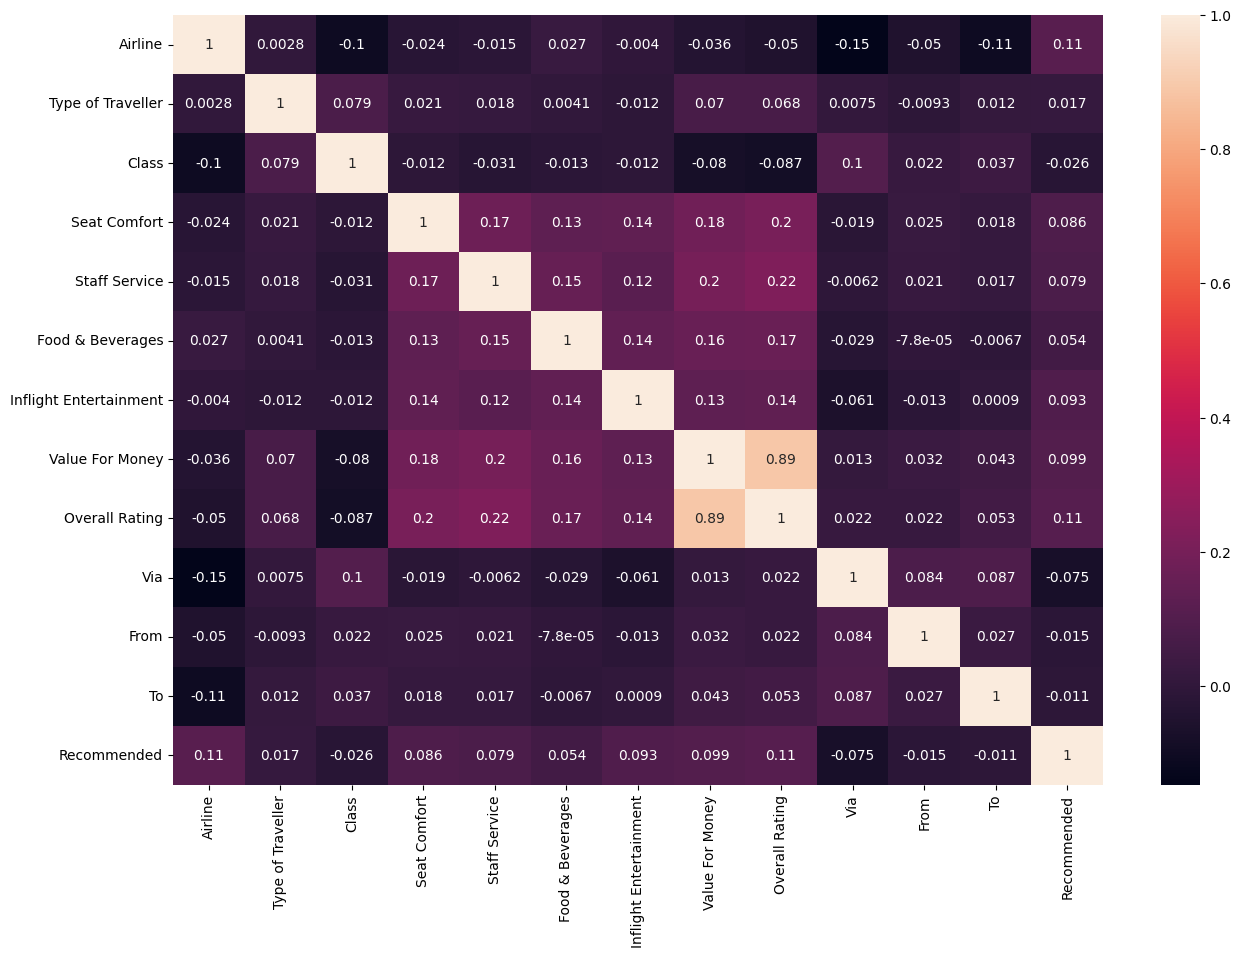

In [ ]:
## Correlation
corr = data.corr()
sns.heatmap(corr,xticklabels = corr.columns.values, yticklabels = corr.columns.values, annot = True)
heat_map = plt.gcf()
heat_map.set_size_inches(15,10)
plt.show()

The key factors influencing customers' decisions to recommend an airline include:

**Airline:** The specific airline plays a significant role in customers' recommendations. Positive experiences with a particular airline, such as good customer service, on-time performance, and overall satisfaction, are likely to lead to recommendations.

**Seat Comfort:** The comfort of the seating arrangements onboard is crucial. Customers are more likely to recommend an airline if they find the seats comfortable, spacious, and conducive to a pleasant travel experience.

**Staff Service :** The quality of service provided by the airline staff, including flight attendants and ground personnel, greatly influences customers' perceptions. Friendly, helpful, and attentive staff are more likely to receive positive recommendations from customers.

**Inflight Entertainment:** The availability and quality of inflight entertainment options, such as movies, TV shows, music, and Wi-Fi connectivity, can enhance the overall travel experience. Airlines offering a wide range of entertainment options are more likely to be recommended by passengers.

**Value of money:** The cost of the flight tickets is a significant factor in customers' decisions. Competitive pricing and value for money are important considerations for customers when deciding whether to recommend an airline.

**Transit Experience:** Whether the flight involves a layover  transit through another airport can impact customers' recommendations. Smooth transit experiences, efficient connections, and convenient facilities at transfer airports contribute to positive recommendations.


#Model


In this problem, the target variable is 'Recommended', indicating whether a customer is recommended (1) or not (0). Both false positives (a customer is predicted to be recommended, but it is not) and false negatives (a customer is predicted not to be recommended, but it is) could incur significant costs for the airline regarding investment categories.

However, in this case, false positives may incur larger costs because the airline may miss out on potential customers by not accurately identifying the investment category that would have a large impact. Therefore, minimizing false positives, meaning maximizing recall for the 'recommended' class (1), would be a good approach.
Precision is also important because with high precision, the false positives rate will decrease, meaning maximizing the cases where the model predicts a customer will be recommended, but they are not recommended. This could lead to misinvestment in categories that are not as important to customers.

Therefore, the F1-score, which is the harmonic mean of precision and recall, would be a good metric to use as it balances both precision and recall. Specifically, the F1-score for the 'Recommended' class (1) would be the most important metric for evaluating models in this project.

I will create a function to identify the best set of hyperparameters that maximize the F1-score for class 1 (recommended bookings). This method provides a reusable framework for hyperparameter tuning for other models as well.







In [ ]:
data

,Airline,Type of Traveller,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Via,From,To,Recommended
0,0.830847,1.025876,-1.289330,0.426388,0.282824,0.433543,0.278164,0.555863,0.969151,0.630310,-0.226561,1.246282,1.0
1,0.830847,1.025876,0.235784,1.140213,-0.371938,0.433543,0.278164,-1.331905,-0.728057,0.630310,0.918500,1.246282,0.0
2,0.830847,0.151497,0.235784,-1.715085,0.937586,-0.936515,-2.010982,1.185119,1.252019,0.630310,1.276731,1.246282,1.0
3,0.830847,1.025876,0.235784,1.140213,0.937586,1.118573,1.041213,1.185119,1.252019,0.630310,1.289525,0.108249,1.0
4,0.830847,0.151497,0.235784,1.140213,0.937586,1.118573,1.041213,1.185119,1.252019,0.630310,1.289525,0.852584,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6211,0.166810,-1.597261,-1.289330,0.426388,0.937586,-0.251486,0.278164,-1.331905,-1.293793,-0.695451,-0.245752,1.357009,0.0
6212,0.166810,1.025876,0.235784,0.426388,0.937586,0.433543,0.278164,1.185119,1.252019,0.630310,1.059233,-0.340813,1.0
6213,0.166810,1.025876,0.235784,-0.287436,0.282824,1.118573,0.278164,-0.073393,0.403415,-0.695451,1.052836,1.018675,1.0
6214,0.166810,-1.597261,0.235784,1.140213,0.282824,1.118573,-0.484885,0.555863,0.403415,-0.695451,-1.537943,1.584616,0.0


In [ ]:
X = data.drop(['Recommended'],axis = 1)
y = data['Recommended']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [ ]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.6334405144694534
Confusion Matrix : 
[[678 101]
 [355 110]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.66      0.87      0.75       779
         1.0       0.52      0.24      0.33       465

    accuracy                           0.63      1244
   macro avg       0.59      0.55      0.54      1244
weighted avg       0.61      0.63      0.59      1244



In [ ]:
#Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.5393890675241158
Confusion Matrix : 
[[469 310]
 [263 202]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.64      0.60      0.62       779
         1.0       0.39      0.43      0.41       465

    accuracy                           0.54      1244
   macro avg       0.52      0.52      0.52      1244
weighted avg       0.55      0.54      0.54      1244



In [ ]:
#Random Forest
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.6430868167202572
Confusion Matrix : 
[[613 166]
 [278 187]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.69      0.79      0.73       779
         1.0       0.53      0.40      0.46       465

    accuracy                           0.64      1244
   macro avg       0.61      0.59      0.60      1244
weighted avg       0.63      0.64      0.63      1244



In [ ]:
#Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.6583601286173634
Confusion Matrix : 
[[588 191]
 [234 231]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.72      0.75      0.73       779
         1.0       0.55      0.50      0.52       465

    accuracy                           0.66      1244
   macro avg       0.63      0.63      0.63      1244
weighted avg       0.65      0.66      0.65      1244



In [ ]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.587620578778135
Confusion Matrix : 
[[528 251]
 [262 203]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.67      0.68      0.67       779
         1.0       0.45      0.44      0.44       465

    accuracy                           0.59      1244
   macro avg       0.56      0.56      0.56      1244
weighted avg       0.59      0.59      0.59      1244



In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf,  acc_gb]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Gradient Boosting Classifier,0.658360
3,Random Forest Classifier,0.643087
0,Logistic Regression,0.633441
1,KNN,0.587621
2,Decision Tree Classifier,0.539389


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')